In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
data = pd.read_csv("winequalityN.csv")
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
pd.DataFrame(data)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [6]:
data1= data.dropna()

In [7]:
data1.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
data1

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [9]:
### Y=96.15919858+-4.08930532e-01(x1)+3.83214373e-02(x2)+-1.51212138e+00(x3)+-5.15838653e-02(x4)+5.51494112e-02(x5)+3.22036772e-01(x6)+
###    4.53180380e-03(x7)+-1.31596732e-03(x8)+-9.46529223e+01 (x9)+4.13438809e-01(x10)+6.39341490e-01(x11)+2.27549517e-01(x12)

In [10]:
X=pd.DataFrame(data1 , columns=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','sulphates','alcohol'])
Y= data1['quality'].values.reshape(-1,1)

In [11]:
X_train , X_test , Y_train ,Y_test = train_test_split(X,Y , test_size=0.30, random_state = 0)

In [12]:
rg =LinearRegression()

In [13]:
KFold_validation= KFold(8)
result =cross_val_score(rg, X,Y, cv =KFold_validation)
print(result)
print(np.mean(result))

[0.21772448 0.22082809 0.21649354 0.29944551 0.31620696 0.14124939
 0.22223005 0.37707279]
0.25140635036023007


In [14]:
data2 =data1[data1.index < 3228]
data3 =data1[data1.index > 4842]
data4 =pd.concat([data2 , data3])
data4

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [15]:
rg.fit(X_train ,Y_train)
y_pred = rg.predict(X_test)

In [16]:
print(rg.intercept_)
print(rg.coef_)

[27.45733563]
[[ 3.71881547e-02 -1.41546093e+00 -2.41035825e-01  3.28142200e-02
  -9.18481693e-01  5.09486409e-03 -2.11967948e-03 -2.51625465e+01
   8.82456485e-01  3.03142320e-01]]


In [17]:
print('r2score :',metrics.r2_score(Y_test , y_pred))

r2score : 0.28501742547055464


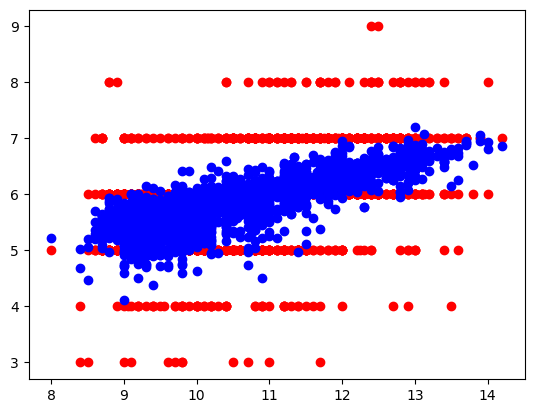

In [18]:
a = X_test.alcohol 
b = Y_test 
c = X_test.alcohol
d = y_pred
plt.scatter(a,b , color = 'red')
plt.scatter(c,d , color = 'blue')
plt.show()

In [19]:
#####   KNN #####

In [20]:
X_train1 , X_test1 , Y_train1 ,Y_test1 = train_test_split(X,Y , test_size=0.03, random_state = 0)

In [21]:
K = 1
acc = np.zeros((K))
for i in range (1 , K+1 ):
    clf =KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train1 ,Y_train1.ravel())
    y_pred1 = clf.predict(X_test1)
    acc[i-1]  =metrics.accuracy_score(Y_test1, y_pred1) 
acc

array([0.63402062])

In [22]:
print(np.max(acc))
print(np.min(acc))

0.634020618556701
0.634020618556701


In [23]:
metrics.accuracy_score(Y_test1, y_pred1) 

0.634020618556701

In [24]:
from sklearn.model_selection import GridSearchCV
parametrs = {'n_neighbors':   range (1,50)}
grid_knn = GridSearchCV(estimator=clf , 
                       param_grid=parametrs,
                       scoring='accuracy',
                       cv=5,
                       verbose=1 ,
                       n_jobs=-1)
grid_knn.fit(X_train , Y_train.ravel())

Fitting 5 folds for each of 49 candidates, totalling 245 fits


c:\Users\milad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=1), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 50)}, scoring='accuracy',
             verbose=1)

In [25]:
 ###### Gausaian #####   forexample i know its continous dataset

In [26]:
X_train2 , X_test2 , Y_train2 ,Y_test2 = train_test_split(X,Y , test_size=0.15, random_state = 0)

In [27]:
nv =GaussianNB()
nv.fit(X_train2 , Y_train2.ravel())
y_pred2 = nv.predict(X_test2)

In [28]:
confusion_matrix(Y,nv.predict(X))

array([[   6,    5,    8,    7,    4,    0,    0],
       [   4,   24,   85,   77,   23,    1,    0],
       [  23,   53, 1112,  794,  146,    0,    0],
       [   6,   70,  725, 1274,  725,   12,    8],
       [   2,   14,  102,  376,  558,   13,    9],
       [   0,    1,   17,   50,  112,   11,    1],
       [   0,    0,    0,    1,    3,    0,    1]], dtype=int64)

In [29]:
print(classification_report(Y , nv.predict(X)))

              precision    recall  f1-score   support

           3       0.15      0.20      0.17        30
           4       0.14      0.11      0.13       214
           5       0.54      0.52      0.53      2128
           6       0.49      0.45      0.47      2820
           7       0.36      0.52      0.42      1074
           8       0.30      0.06      0.10       192
           9       0.05      0.20      0.08         5

    accuracy                           0.46      6463
   macro avg       0.29      0.29      0.27      6463
weighted avg       0.47      0.46      0.46      6463



In [30]:
metrics.accuracy_score(Y_test2, y_pred2) 

0.4618556701030928